# Dependencies

In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [2]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [3]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [4]:

# Declare a Base using `automap_base()`
Base = automap_base()


In [5]:
# reflect an existing database into a new model
Base.prepare(engine, reflect=True)

# reflect the tables
Base.classes.keys()

['measurement', 'station']

In [6]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [7]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [8]:
# Display the first row's columns (heading) and data in the tables (in dictionary format)
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x11ecb56c0>,
 'id': 1,
 'date': '2010-01-01',
 'tobs': 65.0,
 'prcp': 0.08,
 'station': 'USC00519397'}

In [9]:
Starting_date = session.query(Measurement.date).order_by(Measurement.date).first()
Starting_date

('2010-01-01',)

In [10]:
# Find the most recent date in the data set.
query_latest_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
query_latest_date

('2017-08-23',)

In [11]:
import datetime as dt
from datetime import timedelta

In [12]:
# Calculate the date one year from the last date in data set.

Previous_year_date = dt.datetime(2017, 8, 23) - dt.timedelta(days = 365)
print ("1 year previous to the latest date in dataset: ", Previous_year_date)

1 year previous to the latest date in dataset:  2016-08-23 00:00:00


In [13]:

# Perform a query to retrieve the data and precipitation scores

Precipn = session.query(Measurement.date, Measurement.prcp).filter(func.strftime(Measurement.date) >= Previous_year_date).\
        order_by(Measurement.date).all()
Precipn

[('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.35),
 ('2016-08-29', 0.9),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.02),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 (

In [14]:
# Save the query results as a Pandas DataFrame 

Precipn_df = pd.DataFrame(Precipn, columns=['measurement_date', 'precipitation_amount'])
Precipn_df.head()

,measurement_date,precipitation_amount
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,NaN
4,2016-08-24,1.22


In [15]:
# Sort the dataframe by date and set the index to the date column

Precipn_df.dropna(axis=0, how='any', inplace= True)
Precipn_df.sort_values(by='measurement_date')
Precipn_df.set_index('measurement_date', inplace=True)
Precipn_df

,precipitation_amount
measurement_date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,1.22
2016-08-24,2.15
...,...
2017-08-22,0.50
2017-08-23,0.00
2017-08-23,0.00


In [16]:
# Use Pandas to print the summary statistics for the precipitation data.
Precipn_df.describe()

,precipitation_amount
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


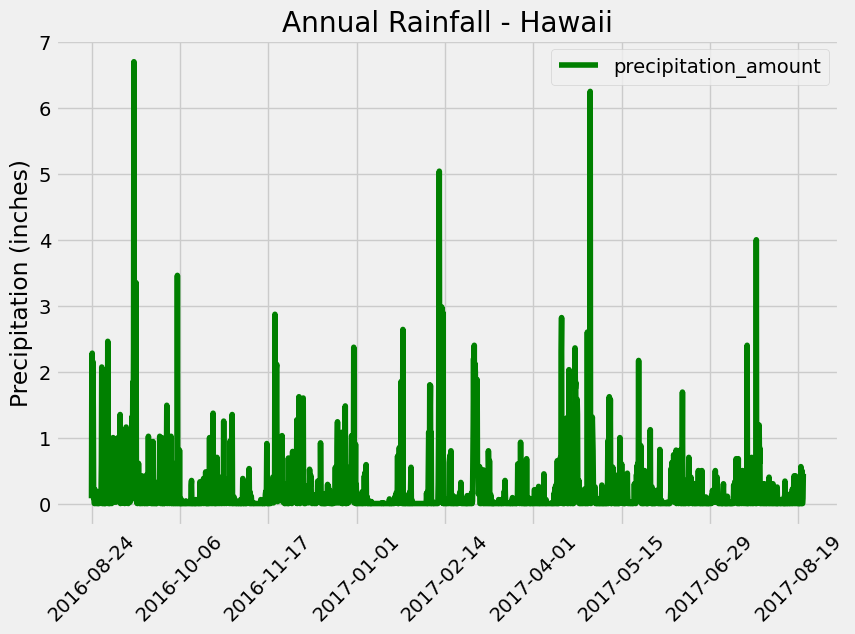

In [74]:
# Use Pandas Plotting with Matplotlib to plot the data
# Use Pandas Plotting with Matplotlib to plot the data
fig1= Precipn_df.plot(rot=45, color="green", title = "Annual Rainfall - Hawaii", xlabel = "", ylabel = "Precipitation (inches)", figsize=(9,6))
plt.savefig("Images/Annual_Precipitation_Hawaii.png")

# Exploratory Station Analysis

In [18]:
# Display the first row's columns (heading) and data in the tables (in dictionary format)
first_row1 = session.query(Station).first()
first_row1.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x11ec4aaa0>,
 'latitude': 21.2716,
 'id': 1,
 'elevation': 3.0,
 'name': 'WAIKIKI 717.2, HI US',
 'longitude': -157.8168,
 'station': 'USC00519397'}

In [19]:
# Design a query to calculate the total number stations in the dataset
Station_no = session.query(Station).group_by(Station.station).count()
Station_no

9

In [20]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)

Active_station = session.query(Measurement.station, func.count(Measurement.date)).group_by(Measurement.station).\
    order_by(func.count(Measurement.date).desc()).all()

Active_station

# List the stations and the counts in descending order.

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [21]:
Highly_active_station = session.query(Measurement.station).group_by(Measurement.station).\
    order_by(func.count(Measurement.date).desc()).first()
Highly_active_station


('USC00519281',)

In [22]:

most_active= Highly_active_station[0]
most_active

'USC00519281'

In [23]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(Measurement.station, func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == most_active).all()

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

In [24]:
# Using the most active station id, query the last 12 months of temperature observation data for this station and plot the results as a histogram
Temp_in_most_active = session.query(Measurement.tobs).filter(Measurement.station == most_active).\
    filter(Measurement.date>=Previous_year_date).all()
Temp_in_most_active

[(77.0,),
 (80.0,),
 (80.0,),
 (75.0,),
 (73.0,),
 (78.0,),
 (77.0,),
 (78.0,),
 (80.0,),
 (80.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (73.0,),
 (74.0,),
 (80.0,),
 (79.0,),
 (77.0,),
 (80.0,),
 (76.0,),
 (79.0,),
 (75.0,),
 (79.0,),
 (78.0,),
 (79.0,),
 (78.0,),
 (78.0,),
 (76.0,),
 (74.0,),
 (77.0,),
 (78.0,),
 (79.0,),
 (79.0,),
 (77.0,),
 (80.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (77.0,),
 (79.0,),
 (79.0,),
 (79.0,),
 (79.0,),
 (75.0,),
 (76.0,),
 (73.0,),
 (72.0,),
 (71.0,),
 (77.0,),
 (79.0,),
 (78.0,),
 (79.0,),
 (77.0,),
 (79.0,),
 (77.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (77.0,),
 (74.0,),
 (75.0,),
 (76.0,),
 (73.0,),
 (76.0,),
 (74.0,),
 (77.0,),
 (76.0,),
 (76.0,),
 (74.0,),
 (75.0,),
 (75.0,),
 (75.0,),
 (75.0,),
 (71.0,),
 (63.0,),
 (70.0,),
 (68.0,),
 (67.0,),
 (77.0,),
 (74.0,),
 (77.0,),
 (76.0,),
 (76.0,),
 (75.0,),
 (76.0,),
 (75.0,),
 (73.0,),
 (75.0,),
 (73.0,),
 (75.0,),
 (74.0,),
 (75.0,),
 (74.0,),
 (75.0,),
 (73.0,),
 (75.0,),
 (73.0,),
 (73.0,),
 (74.0,),


In [25]:
df_temp = pd.DataFrame(Temp_in_most_active)
df_temp

,tobs
0,77.0
1,80.0
2,80.0
3,75.0
4,73.0
...,...
346,77.0
347,77.0
348,76.0
349,76.0


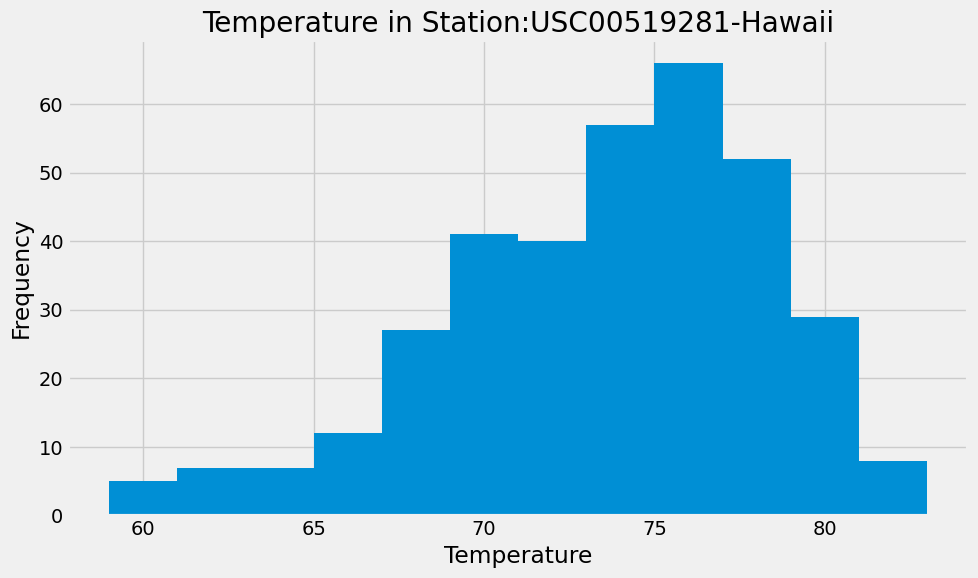

In [26]:
# plot histogram

plt.figure(figsize=(10,6))
plt.hist(df_temp["tobs"], bins=12)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.title("Temperature in Station:USC00519281-Hawaii")
plt.tight_layout()
plt.show()



In [27]:
plt.savefig("Images/Temp_frequecy.png")

<Figure size 640x480 with 0 Axes>

# Bonus Activities

### Temperature I

In [28]:
df = pd.read_csv("./Resources/hawaii_measurements.csv")
df.head()

,station,date,prcp,tobs
0,USC00519397,2010-01-01,0.08,65
1,USC00519397,2010-01-02,0.00,63
2,USC00519397,2010-01-03,0.00,74
3,USC00519397,2010-01-04,0.00,76
4,USC00519397,2010-01-06,NaN,73


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19550 entries, 0 to 19549
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   station  19550 non-null  object 
 1   date     19550 non-null  object 
 2   prcp     18103 non-null  float64
 3   tobs     19550 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 611.1+ KB


In [30]:
df['date'] = pd.to_datetime(df['date'])

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19550 entries, 0 to 19549
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   station  19550 non-null  object        
 1   date     19550 non-null  datetime64[ns]
 2   prcp     18103 non-null  float64       
 3   tobs     19550 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 611.1+ KB


In [32]:
# Set the date column as the DataFrame index
df.set_index('date', inplace=True)

In [33]:
df = df.reset_index()

In [34]:
df_dec = df[df['date'].dt.strftime('%m')=='12']
dec_temp = df_dec['tobs'].mean()
dec_temp

71.04152933421226

In [35]:
df_jun = df[df['date'].dt.strftime('%m')=='06']
Jun_temp = df_jun['tobs'].mean()
Jun_temp

74.94411764705882

In [36]:
print("June average temperature: ", Jun_temp)
print("Decempber average temperature: ", dec_temp)


June average temperature:  74.94411764705882
Decempber average temperature:  71.04152933421226


##### Alternatively the above can be queried (using the sqlalchemy-session) as follows!

In [37]:
June_temps = session.query(Measurement.date, Measurement.tobs).\
        filter(func.strftime('%m', Measurement.date) == '06').all()

In [38]:
June_df = pd.DataFrame(June_temps,columns=["Date","Temperature"])

In [39]:
December_temps = session.query(Measurement.date, Measurement.tobs).\
        filter(func.strftime('%m', Measurement.date) == '12').all()

In [40]:
December_df = pd.DataFrame(December_temps,columns=["Date","Temperature"])

In [41]:
# Extract June and December temperature data into dataframes

June_average = June_df["Temperature"].mean()
December_average = December_df["Temperature"].mean()

June_average = June_df["Temperature"].mean()
December_average = December_df["Temperature"].mean()

print("June Avr: ", June_average)
print("Decempber Avr: ", December_average)

June Avr:  74.94411764705882
Decempber Avr:  71.04152933421226


In [42]:
from scipy.stats import ttest_ind

In [43]:
ttest_ind(June_df["Temperature"], December_df["Temperature"])

Ttest_indResult(statistic=31.60372399000329, pvalue=3.9025129038616655e-191)

### Temperature II

In [44]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, maximum, and average temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# For example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [45]:
# Use`calc_temps` to calculate the tmin, tavg, and tmax for your trip using the previous year's data for those same dates.
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
temps = calc_temps('2017-08-01', '2017-08-07')
temps

[(72.0, 79.25, 83.0)]

In [46]:
Trip_df = pd.DataFrame(temps, columns =('Tmin','Tavg','Tmax'))
Trip_df.head()

,Tmin,Tavg,Tmax
0,72.0,79.25,83.0


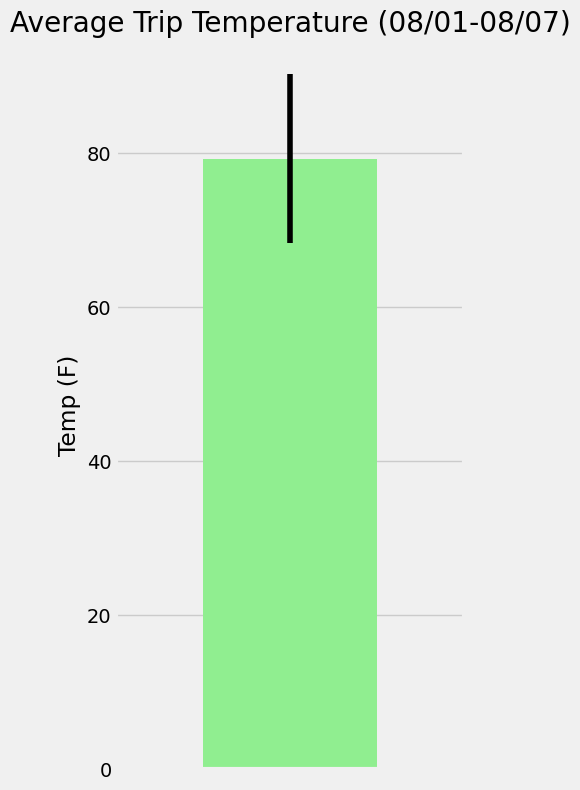

In [47]:
#plot the figure
plt.figure(figsize=(4,9))
ax = Trip_df['Tavg'].plot.bar(yerr = (Trip_df['Tmax']-Trip_df['Tmin']), color='lightgreen', title = "Average Trip Temperature (08/01-08/07)", ylabel = "Temp (F)")
ax.axes.get_xaxis().set_visible(False)
plt.show()

In [48]:
# Save the plot
ax.figure.savefig('images/Trip_average_temp.png', bbox_inches='tight')

### Daily Rainfall Average

In [49]:
# Calculate the total amount of rainfall/weather station for the trip dates using the previous year's matching dates.
# Sort it in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

Trip_start_date = '2017-08-01'
Trip_end_date = '2017-08-07'

params = [Measurement.station,
       Station.name,
       Station.latitude,
       Station.longitude,
       Station.elevation,
       func.sum(Measurement.prcp)
      ]

station_totals = session.query(*params).\
        filter(Measurement.station == Station.station, func.strftime(Measurement.date) >= Trip_start_date, func.strftime(Measurement.date) <= Trip_end_date).\
        group_by(Station.station).\
        order_by(func.sum(Measurement.prcp).desc()).all()

station_totals

[('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 0.36),
 ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 0.22),
 ('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 0.06),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.04),
 ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5, 0.0)]

In [50]:
# Convert query object to data frame
rain_df = pd.DataFrame(np.array(station_totals))
rain_df = rain_df.rename(
    columns={
        0: "Station",
        1: "Location",
        2: "Latitude",
        3: "Longitude",
        4: "Elevation",
        5: "Total Precipitation",
    }
)
rain_df


,Station,Location,Latitude,Longitude,Elevation,Total Precipitation
0,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.3331,-157.8025,152.4,0.36
1,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.5213,-157.8374,7.0,0.22
2,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84888999999998,32.9,0.06
3,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0,0.04
4,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5,0.0


In [51]:
pip install dataframe-image


[notice] A new release of pip available: 22.2.1 -> 22.3.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [52]:
import dataframe_image as dfi


In [53]:
dfi.export(rain_df, 'Images/data_stationrain.png')


objc[89282]: Class WebSwapCGLLayer is implemented in both /System/Library/Frameworks/WebKit.framework/Versions/A/Frameworks/WebCore.framework/Versions/A/Frameworks/libANGLE-shared.dylib (0x7ffb57c40ec8) and /Applications/Google Chrome.app/Contents/Frameworks/Google Chrome Framework.framework/Versions/106.0.5249.91/Libraries/libGLESv2.dylib (0x114835668). One of the two will be used. Which one is undefined.
[1114/160340.712658:INFO:headless_shell.cc(660)] Written to file /var/folders/p1/gmm0j2t92x506qp9p1glb_1m0000gn/T/tmpjzc7swa1/temp.png.


In [54]:
# Use this function to calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()

# For example
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [55]:
# Set the start and end date of the trip (already set earlier in the notebook)
print(Trip_start_date, Trip_end_date)

2017-08-01 2017-08-07


In [56]:
# calculate the daily normals for your trip and push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip
start_date = dt.datetime(2017, 8, 1)
end_date = dt.datetime(2017, 8, 7)

# Use the start and end date to create a range of dates
datelist = pd.date_range(start_date, periods=7).tolist()

# Stip off the year and save a list of %m-%d strings
dates = []
for date in datelist:
    dates.append(dt.datetime.strftime(date, '%m-%d'))

# Loop through the list of %m-%d strings and calculate the normals for each date
normals = []
for date in dates:
    normals.append(daily_normals(date))

print("Chosen Dates: Aug 01 to Aug 07 (7 day trip)")
for normal in normals:
    print(normal)


Chosen Dates: Aug 01 to Aug 07 (7 day trip)
[(67.0, 75.54, 83.0)]
[(68.0, 75.60377358490567, 84.0)]
[(70.0, 76.61111111111111, 85.0)]
[(69.0, 76.71153846153847, 84.0)]
[(69.0, 76.14814814814815, 82.0)]
[(67.0, 76.25, 83.0)]
[(71.0, 77.15686274509804, 83.0)]


In [57]:
# Load the list of daily normals into a Pandas DataFrame, and set the index equal to the date.

normal_list = []
for normal in normals:
    normal_list.append(np.ravel(normal))
trip_normals_df = pd.DataFrame(normal_list, columns = ['Tmin', 'Tavg', 'Tmax'])
trip_normals_df.index = [str(date.strftime('%Y-%m-%d')) for date in datelist]
trip_normals_df

,Tmin,Tavg,Tmax
2017-08-01,67.0,75.540000,83.0
2017-08-02,68.0,75.603774,84.0
2017-08-03,70.0,76.611111,85.0
2017-08-04,69.0,76.711538,84.0
2017-08-05,69.0,76.148148,82.0
2017-08-06,67.0,76.250000,83.0
2017-08-07,71.0,77.156863,83.0


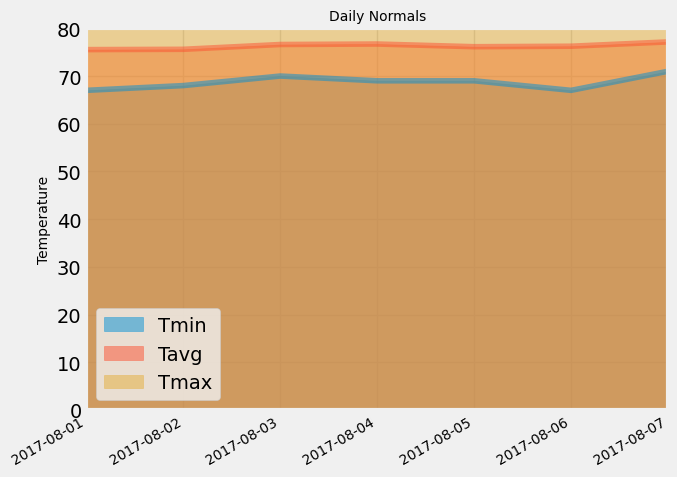

In [75]:
# Plot the daily normals as an area plot with `stacked=False`
fig, ax1 = plt.subplots(figsize=(7,5))
trip_normals_df.plot(kind='area', stacked=False, alpha=0.5, ax=ax1)
plt.title("Daily Normals",fontsize=10)
plt.ylabel("Temperature",fontsize=10)
plt.xlabel("",fontsize=10)

plt.ylim(0,80)
plt.xlim(0,4)
plt.yticks(size=14)
plt.xticks(np.arange(7), trip_normals_df.index,fontsize=10)
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=30, ha="right")
plt.tight_layout()
plt.show()

In [76]:
ax1.figure.savefig('images/TempNormalsforTrip.png', bbox_inches='tight')


In [77]:
session.close()